<a href="https://colab.research.google.com/github/3D-Generation-Project-Kmitl/3d-model-generation/blob/main/point_cloud_to_mesh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install open3d

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 408.6 MB 30 kB/s 
     |████████████████████████████████| 8.8 MB 1.7 MB/s 
     |████████████████████████████████| 3.1 MB 32.0 MB/s 
     |████████████████████████████████| 1.1 MB 78.6 MB/s 
     |████████████████████████████████| 344 kB 52.2 MB/s 
     |████████████████████████████████| 9.7 MB 20.2 MB/s 
     |████████████████████████████████| 423 kB 50.5 MB/s 
     |████████████████████████████████| 54 kB 2.3 MB/s 
     |████████████████████████████████| 1.6 MB 46.4 MB/s 
     |████████████████████████████████| 1.2 MB 44.8 MB/s 
     |████████████████████████████████| 59 kB 5.9 MB/s 
     |████████████████████████████████| 55 kB 2.9 MB/s 
     |████████████████████████████████| 80 kB 6.9 MB/s 
     |████████████████████████████████| 271 kB 50.8 MB/s 
     |████████████████████████████████| 133 kB 43.1 MB/s 
     |████████████████████████████████| 

In [ ]:
import numpy as np
import open3d as o3d
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# Surface Reconstruction Tutorial

In [ ]:
def draw_geometries(geometries):
    graph_objects = []

    for geometry in geometries:
        geometry_type = geometry.get_geometry_type()
        
        if geometry_type == o3d.geometry.Geometry.Type.PointCloud:
            points = np.asarray(geometry.points)
            colors = None
            if geometry.has_colors():
                colors = np.asarray(geometry.colors)
            elif geometry.has_normals():
                colors = (0.5, 0.5, 0.5) + np.asarray(geometry.normals) * 0.5
            else:
                geometry.paint_uniform_color((1.0, 0.0, 0.0))
                colors = np.asarray(geometry.colors)

            scatter_3d = go.Scatter3d(x=points[:,0], y=points[:,1], z=points[:,2], mode='markers', marker=dict(size=1, color=colors))
            graph_objects.append(scatter_3d)

        if geometry_type == o3d.geometry.Geometry.Type.TriangleMesh:
            triangles = np.asarray(geometry.triangles)
            vertices = np.asarray(geometry.vertices)
            colors = None
            if geometry.has_triangle_normals():
                colors = (0.5, 0.5, 0.5) + np.asarray(geometry.triangle_normals) * 0.5
                colors = tuple(map(tuple, colors))
            else:
                colors = (1.0, 0.0, 0.0)
            
            mesh_3d = go.Mesh3d(x=vertices[:,0], y=vertices[:,1], z=vertices[:,2], i=triangles[:,0], j=triangles[:,1], k=triangles[:,2], facecolor=colors, opacity=0.50)
            graph_objects.append(mesh_3d)
        
    fig = go.Figure(
        data=graph_objects,
        layout=dict(
            scene=dict(
                xaxis=dict(visible=False),
                yaxis=dict(visible=False),
                zaxis=dict(visible=False)
            )
        )
    )
    fig.show()
o3d.visualization.draw_geometries = draw_geometries

In [ ]:
bunny = o3d.data.BunnyMesh()
mesh = o3d.io.read_triangle_mesh(bunny.path)
mesh.compute_vertex_normals()

pcd = mesh.sample_points_poisson_disk(750)
o3d.visualization.draw_geometries([pcd])
alpha = 0.02
print(f"alpha={alpha:.3f}")
mesh = o3d.geometry.TriangleMesh.create_from_point_cloud_alpha_shape(pcd, alpha)
mesh.compute_vertex_normals()
o3d.visualization.draw_geometries([mesh])

[Open3D INFO] Downloading https://github.com/isl-org/open3d_downloads/releases/download/20220201-data/BunnyMesh.ply
[Open3D INFO] Downloaded to /root/open3d_data/download/BunnyMesh/BunnyMesh.ply


alpha=0.020


In [ ]:
radii = [0.005, 0.01, 0.02, 0.04]
rec_mesh = o3d.geometry.TriangleMesh.create_from_point_cloud_ball_pivoting(
    pcd, o3d.utility.DoubleVector(radii))
o3d.visualization.draw_geometries([pcd, rec_mesh])

In [ ]:
with o3d.utility.VerbosityContextManager(
        o3d.utility.VerbosityLevel.Debug) as cm:
    mesh, densities = o3d.geometry.TriangleMesh.create_from_point_cloud_poisson(
        pcd, depth=9)
print(mesh)
o3d.visualization.draw_geometries([mesh])

[Open3D DEBUG] Input Points / Samples: 750 / 750
[Open3D DEBUG] #   Got kernel density: 0.031291 (s), 280.328 (MB) / 280.328 (MB) / 280 (MB)
[Open3D DEBUG] #     Got normal field: 0.0370681 (s), 282.781 (MB) / 282.781 (MB) / 282 (MB)
[Open3D DEBUG] Point weight / Estimated Area: 3.892655e-03 / 2.919491e+00
[Open3D DEBUG] #       Finalized tree: 0.0870910 (s), 288.449 (MB) / 288.449 (MB) / 288 (MB)
[Open3D DEBUG] #  Set FEM constraints: 0.150505 (s), 289.277 (MB) / 289.277 (MB) / 289 (MB)
[Open3D DEBUG] #Set point constraints: 0.00524306 (s), 289.277 (MB) / 289.277 (MB) / 289 (MB)
[Open3D DEBUG] Leaf Nodes / Active Nodes / Ghost Nodes: 138167 / 66888 / 91017
[Open3D DEBUG] Memory Usage: 289.277 MB
[Open3D DEBUG] # Linear system solved: 0.126051 (s), 289.531 (MB) / 289.531 (MB) / 289 (MB)
[Open3D DEBUG] Got average: 0.00508189 (s), 289.531 (MB) / 289.531 (MB) / 289 (MB)
[Open3D DEBUG] Iso-Value: 5.022528e-01 = 3.766896e+02 / 7.500000e+02
[Open3D DEBUG] #          Total Solve:       1.2 (

# Surface Reconstruction from ARCore's point clouds

In [ ]:
def reshapePointCloudData(pointCloud):
  column=4
  print(pointCloud.shape)
  row=int(pointCloud.shape[0]/column)
  pointCloud=np.reshape(pointCloud,(row,column))
  pointCloud=pointCloud[~np.all(pointCloud == 0, axis=1)]
  print("Confidence Value Histogram(The value should be between 0 and 1):")
  plt.hist(pointCloud[:,3])
  plt.show() 
  pointCloud=np.delete(pointCloud, 3, 1)
  return pointCloud

(57600,)
Confidence Value Histogram(The value should be between 0 and 1):


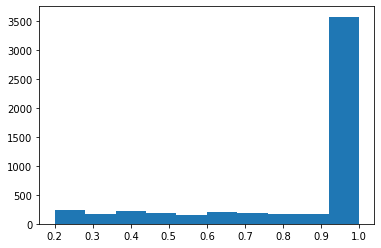

array([[ 0.19932479, -0.5436165 , -0.73730594],
       [ 0.19999647, -0.54771364, -0.7380295 ],
       [ 0.20066842, -0.5518439 , -0.73874134],
       ...,
       [-0.313243  , -1.1374323 , -0.67577994],
       [-0.30819494, -1.1366946 , -0.66474015],
       [-0.30360344, -1.1364034 , -0.6545689 ]], dtype=float32)

In [ ]:
rawDepthPointCloudData= np.fromfile("rawDepthPointCloudData.txt", dtype = np.float32)
rawDepthPointCloudData=reshapePointCloudData(rawDepthPointCloudData)
rawDepthPointCloudData

In [ ]:
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(rawDepthPointCloudData)
o3d.visualization.draw_geometries([pcd])

In [ ]:
alpha = 0.02
print(f"alpha={alpha:.3f}")
mesh = o3d.geometry.TriangleMesh.create_from_point_cloud_alpha_shape(pcd, alpha)
mesh.compute_vertex_normals()
o3d.visualization.draw_geometries([mesh])

alpha=0.020


In [ ]:
radii = [0.005, 0.01, 0.02, 0.04]
pcd.estimate_normals(
    search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1, max_nn=30))
rec_mesh = o3d.geometry.TriangleMesh.create_from_point_cloud_ball_pivoting(
    pcd, o3d.utility.DoubleVector(radii))
o3d.visualization.draw_geometries([rec_mesh])

In [ ]:
with o3d.utility.VerbosityContextManager(
        o3d.utility.VerbosityLevel.Debug) as cm:
    mesh, densities = o3d.geometry.TriangleMesh.create_from_point_cloud_poisson(
        pcd, depth=9)
print(mesh)
o3d.visualization.draw_geometries([mesh])

[Open3D DEBUG] Input Points / Samples: 5284 / 5284
[Open3D DEBUG] #   Got kernel density: 0.022465 (s), 322.953 (MB) / 322.953 (MB) / 324 (MB)
[Open3D DEBUG] #     Got normal field: 0.0181091 (s), 322.953 (MB) / 322.953 (MB) / 324 (MB)
[Open3D DEBUG] Point weight / Estimated Area: 1.276087e-04 / 6.742843e-01
[Open3D DEBUG] #       Finalized tree: 0.0493379 (s), 323.207 (MB) / 323.207 (MB) / 324 (MB)
[Open3D DEBUG] #  Set FEM constraints: 0.26274 (s), 323.719 (MB) / 323.719 (MB) / 324 (MB)
[Open3D DEBUG] #Set point constraints: 0.0187008 (s), 323.719 (MB) / 323.719 (MB) / 324 (MB)
[Open3D DEBUG] Leaf Nodes / Active Nodes / Ghost Nodes: 194510 / 151928 / 70369
[Open3D DEBUG] Memory Usage: 323.719 MB
[Open3D DEBUG] # Linear system solved: 0.28936 (s), 328.281 (MB) / 328.281 (MB) / 328 (MB)
[Open3D DEBUG] Got average: 0.0190959 (s), 328.281 (MB) / 328.281 (MB) / 328 (MB)
[Open3D DEBUG] Iso-Value: 4.986042e-01 = 2.634625e+03 / 5.284000e+03
[Open3D DEBUG] #          Total Solve:       2.1 (s